In [ ]:
#analysis

#Negative correlation between average fare and total number of rides per city.
#Positive correlation between total number of rides per city and driver count per city.
#Negative correlation between average fare and driver count per city.

In [2]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#read city_df and sort
city_df = pd.read_csv('city_data.csv', low_memory = False)
city_df = city_df.sort_values('city')
groupedcity_df = city_df.groupby('city').sum() #groups and removes extra 'Port James'
groupedcity_df = groupedcity_df.reset_index()
typecity_df = city_df[['city','type']]
typecity_df = typecity_df.drop_duplicates()
mergedcity_df = pd.merge(groupedcity_df, typecity_df, how='outer', on='city')

#read ride_df
ride_df = pd.read_csv('ride_data.csv', low_memory = False)

#df merge
df = pd.merge(mergedcity_df, ride_df, how='outer', on='city')
df = df[['city', 'type', 'fare']]

In [4]:
#urban DFs
urban_df = df.loc[df['type'] == 'Urban']
urban_df = urban_df[['city', 'fare']]
urban_city = city_df.loc[city_df['type'] == 'Urban']

#urban list of cities
urban_cities = urban_city['city'].unique()

#urban size
urban_numDrivers = urban_city['driver_count'].tolist()
urban_size = [(n**1.5) for n in urban_numDrivers]

#urban x- and y-values
urban_aveFare, urban_numRides = [], []
for city in urban_cities:
    urban_single_aveFare = urban_df.loc[urban_df['city'] == city, 'fare'].mean()
    urban_single_numRides = urban_df.loc[urban_df['city'] == city, 'fare'].count()
    urban_aveFare.append(round(urban_single_aveFare, 2))
    urban_numRides.append(urban_single_numRides)

In [5]:
#suburban DFs
suburban_df = df.loc[df['type'] == 'Suburban']
suburban_df = suburban_df[['city', 'fare']]
suburban_city = city_df.loc[city_df['type'] == 'Suburban']

#suburban list of cities
suburban_cities = suburban_city['city'].unique()

#urban size
suburban_numDrivers = suburban_city['driver_count'].tolist()
suburban_size = [(n**1.5) for n in suburban_numDrivers]

#suburban x- and y-values
suburban_aveFare, suburban_numRides = [], []
for city in suburban_cities:
    suburban_single_aveFare = suburban_df.loc[suburban_df['city'] == city, 'fare'].mean()
    suburban_single_numRides = suburban_df.loc[suburban_df['city'] == city, 'fare'].count()
    suburban_aveFare.append(round(suburban_single_aveFare, 2))
    suburban_numRides.append(suburban_single_numRides)

In [6]:
#rural DFs
rural_df = df.loc[df['type'] == 'Rural']
rural_df = rural_df[['city', 'fare']]
rural_city = city_df.loc[city_df['type'] == 'Rural']

#rural list of cities
rural_cities = rural_city['city'].unique()

#rural size
rural_numDrivers = rural_city['driver_count'].tolist()
rural_size = [(n**1.5) for n in rural_numDrivers]

#rural x- and y-values
rural_aveFare, rural_numRides = [], []
for city in rural_cities:
    rural_single_aveFare = rural_df.loc[rural_df['city'] == city, 'fare'].mean()
    rural_single_numRides = rural_df.loc[rural_df['city'] == city, 'fare'].count()
    rural_aveFare.append(round(rural_single_aveFare, 2))
    rural_numRides.append(rural_single_numRides)

In [7]:
#plot data
urban = plt.scatter(urban_numRides, urban_aveFare, color='lightcoral', edgecolor='black', 
                    s=urban_size, alpha=0.7, label='Urban')

suburban = plt.scatter(suburban_numRides, suburban_aveFare, color='lightskyblue', edgecolor='black', 
                       s=suburban_size, alpha=0.7, label='Suburban')

rural = plt.scatter(rural_numRides, rural_aveFare, color='gold', edgecolor='black', 
                    s=rural_size, alpha=0.7, label='Rural')

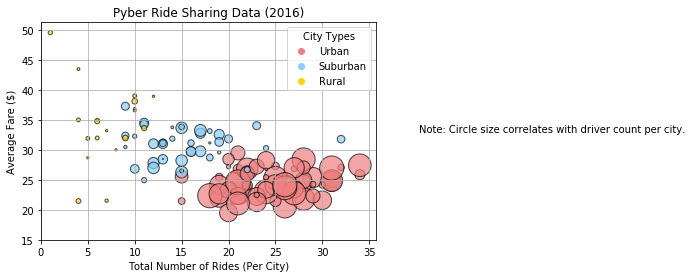

In [8]:
#bubble plot
plt.ylim(ymin=15)
plt.xlim(xmin=0)
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.figtext(1, 0.5, 'Note: Circle size correlates with driver count per city.')
legendColors = {'Urban':'lightcoral', 'Suburban':'lightskyblue', 'Rural':'gold'}
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in legendColors.values()]
plt.legend(markers, legendColors.keys(), numpoints=1, title='City Types', loc='best')
plt.rcParams['figure.figsize'] = [12,7]
plt.grid()
plt.show()

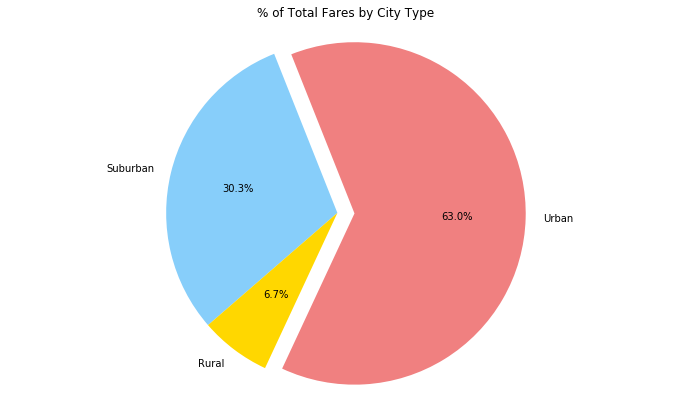

In [9]:
#% of total fares by city type
cityTypes = ['Urban', 'Suburban', 'Rural']
cityColors = ['lightcoral', 'lightskyblue', 'gold']
explode = (0.1, 0, 0)
fare_sizes = []

for cityType in cityTypes:
    cityFare = round(df.loc[df['type'] == cityType, 'fare'].sum(), 2)
    fare_sizes.append(cityFare)

plt.pie(fare_sizes, explode=explode, labels=cityTypes, colors=cityColors,
        autopct='%1.1f%%', shadow=False, startangle=245) #autopct sums all values and calculates percentages
plt.axis('equal')
plt.title('% of Total Fares by City Type')
plt.show()

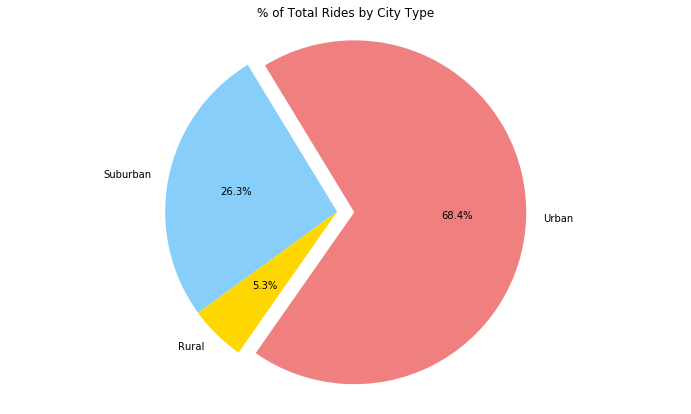

In [10]:
#% of total rides by city type
ride_sizes = []

for cityType in cityTypes:
    cityRides = df.loc[df['type'] == cityType, 'fare'].count()
    ride_sizes.append(cityRides)

plt.pie(ride_sizes, explode=explode, labels=cityTypes, colors=cityColors,
        autopct='%1.1f%%', shadow=False, startangle=235) #autopct sums all values and calculates percentages
plt.axis('equal')
plt.title('% of Total Rides by City Type')
plt.show()

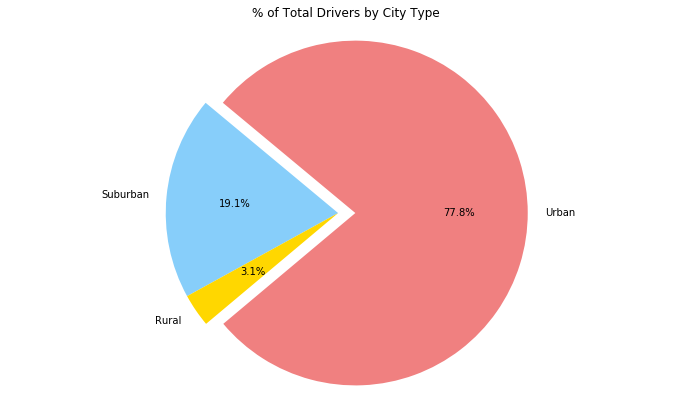

In [11]:
#% of total drivers by city type
drivers_sizes = []

for cityType in cityTypes:
    cityDrivers = mergedcity_df.loc[mergedcity_df['type'] == cityType, 'driver_count'].sum()
    drivers_sizes.append(cityDrivers)

plt.pie(drivers_sizes, explode=explode, labels=cityTypes, colors=cityColors,
        autopct='%1.1f%%', shadow=False, startangle=220) #autopct sums all values and calculates percentages
plt.axis('equal')
plt.title('% of Total Drivers by City Type')
plt.show()